In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#from __future__ import division
import pandas as pd
import numpy as np
from ggplot import *

import os
import sys

In [3]:
# Sample titles with corresponding barcodes
samples = {
    's9': ['ATCACG', 'ACAGTG'],
    's9+bcm': ['CGATGT', 'GCCAAT'],
    's17': ['TTAGGC', 'GATCAG'],
    's17+bcm': ['TGACCA', 'TAGCTT'],
    's19': ['CAGATC','GGCTAC'],
    's19+bcm': ['ACTTGA', 'CTTGTA']
}

# Barcodes
barcodes = ['ATCACG', 'ACAGTG', 'CGATGT', 'GCCAAT', 'TTAGGC', 'GATCAG',
            'TGACCA', 'TAGCTT', 'CAGATC','GGCTAC', 'ACTTGA', 'CTTGTA']

In [4]:
def extract_gff(line, ftype='gene'):
    rec = {}
    fields = line.strip().split('\t')
    if fields[2] != ftype:
        return None
    opts = {}
    for f in fields[8].split(';'):
        k,v = f.split('=')
        opts[k] = v
        
    rec.update({
            'gene': opts['gene'],
            'start': int(fields[3]),
            'end': int(fields[4]),
            'strand': fields[6]
        })
    return rec


def extract_bed(line):
    rec = {}
    fields = line.strip().split('\t')
    rec.update({
            'TU': ''.join([x for x in fields[3].split('-')[2:]]),
            'start': int(fields[1]),
            'end': int(fields[2]),
            'strand': fields[5]
        })
    return rec



def anno_df(annofile, extract=extract_gff):
    result = []
    with open(annofile) as fi:
        for line in fi:
            if not line.startswith('#'):
                rec = extract(line)
                if rec:
                    result.append(rec)
    return pd.DataFrame.from_records(result)

In [5]:
gff = anno_df('../../ref/NC_000913.gff')
gff

,end,gene,start,strand
0,255,thrL,190,+
1,2799,thrA,337,+
2,3733,thrB,2801,+
3,5020,thrC,3734,+
4,5530,yaaX,5234,+
5,6459,yaaA,5683,-
6,7959,yaaJ,6529,-
7,9191,talB,8238,+
8,9893,mog,9306,+
9,10494,yaaH,9928,-


In [6]:
# 5' UTR annotations
res = []
with open('../../results/redux/utrs_corr.bed', 'r') as fi:
    for line in fi:
        fields = line.strip().split()
        res.append({
                'gene': fields[3],
                'start': int(fields[1]),
                'end': int(fields[2]),
            })
 
utrs = pd.DataFrame.from_records(res)
utrs['UTR_length'] = utrs.end - utrs.start
utrs


,end,gene,start,UTR_length
0,190,thrL,148,42
1,190,thrL,148,42
2,5234,yaaX,5030,204
3,6587,yaaA,6459,128
4,6615,yaaA,6459,156
5,8017,yaaJ,7959,58
6,8238,talB,8191,47
7,10830,htgA,10643,187
8,10830,htgA,10644,186
9,11542,yaaW,11356,186


In [7]:
dfa = utrs.merge(gff, on='gene', how='left').dropna()
dfa

,end_x,gene,start_x,UTR_length,end_y,start_y,strand
0,190,thrL,148,42,255.0,190.0,+
1,190,thrL,148,42,255.0,190.0,+
2,5234,yaaX,5030,204,5530.0,5234.0,+
3,6587,yaaA,6459,128,6459.0,5683.0,-
4,6615,yaaA,6459,156,6459.0,5683.0,-
5,8017,yaaJ,7959,58,7959.0,6529.0,-
6,8238,talB,8191,47,9191.0,8238.0,+
9,11542,yaaW,11356,186,11356.0,10643.0,-
10,11825,yaaI,11786,39,11786.0,11382.0,-
11,11913,yaaI,11786,127,11786.0,11382.0,-


In [15]:
import pysam


def get_ratio(df, bamfile, reference, win=50, offset=200):

    def _utr_orf_ratio(rec):
        
        def _counts(start, end):
            count = 1
            #start = int(rec[key5])
            #end = int(rec[key3])
            #if end < start:
            #    start, end = end, start
            for read in bam.fetch(reference, start, end):
                count += 1
            return float(count)
        
        if rec['strand'] == '-':
            end_utr = rec['end_x']
            start_utr = end_utr - win
            end_orf = end_utr - offset
            start_orf = end_orf - win
        else:
            start_utr = rec['start_x']
            end_utr = start_utr + win
            start_orf = rec['start_x'] + offset
            end_orf = start_orf + win
            
        return _counts(start_utr, end_utr) / _counts(start_orf, end_orf)

    bam = pysam.AlignmentFile(bamfile, 'rb')
    return df.apply(_utr_orf_ratio, axis=1)




def get_utr_ratio_df(df, barcodes, res_dir='../results', win=50, offset=200):
    '''
    Calculates 5'UTR coverage
    Iterates over files whose name ends with '_sorted.bam' in `res_dir` and contains barcodes
    specified in `barcodes`.
    
    Adds `utr_<barcode>` column to df DataFrame
    '''
    d, _, filenames = next(os.walk(res_dir))
    infiles = [f for f in filenames if f.endswith('_sorted.bam')]
    for barcode in barcodes:
        bamfile = os.path.join(d, [f for f in infiles if barcode in f][0])
        df['ratio_{0}'.format(barcode)] = get_ratio(df,
                                            bamfile, 
                                            'gi|556503834|ref|NC_000913.3|',
                                            win, offset)


In [18]:
offsets = [150,200,300]
winsizes = [50,80,100,200]
output_tpl = '../../results/redux/dfa.offset_{}.win_{}.csv'

for offset in offsets:
    for winsize in winsizes:
        d = dfa.copy()
        print('\tprocessing offset={}\t winsize={}'.format(offset, winsize))
        get_utr_ratio_df(d, ['ATCACG', 'ACAGTG', 'CGATGT', 'GCCAAT'], res_dir='../../results/', offset=offset, win=winsize)
        d.to_csv(output_tpl.format(offset, winsize))

	processing offset=150	 winsize=50
	processing offset=150	 winsize=80
	processing offset=150	 winsize=100
	processing offset=150	 winsize=200
	processing offset=200	 winsize=50
	processing offset=200	 winsize=80
	processing offset=200	 winsize=100
	processing offset=200	 winsize=200
	processing offset=300	 winsize=50
	processing offset=300	 winsize=80
	processing offset=300	 winsize=100
	processing offset=300	 winsize=200


In [19]:
offsets = [150,200,300]
winsizes = [50,80,100,200]
output_tpl = '../../results/redux/dfa.offset_{}.win_{}.csv'

output = []

for offset in offsets:
    for winsize in winsizes:
        df = pd.DataFrame.from_csv(output_tpl.format(offset, winsize))
        df['win'] = winsize
        df['offset'] = offset
        output.append(df)
        
dfa = pd.concat(output)

In [20]:
dfa

,end_x,gene,start_x,UTR_length,end_y,start_y,strand,ratio_ATCACG,ratio_ACAGTG,ratio_CGATGT,ratio_GCCAAT,win,offset
0,190,thrL,148,42,255.0,190.0,+,3.000000,2.784355,0.911828,3.178117,50,150
1,190,thrL,148,42,255.0,190.0,+,3.000000,2.784355,0.911828,3.178117,50,150
2,5234,yaaX,5030,204,5530.0,5234.0,+,4.576923,6.983333,1.264901,1.436242,50,150
3,6587,yaaA,6459,128,6459.0,5683.0,-,0.032028,0.072193,0.567568,0.600000,50,150
4,6615,yaaA,6459,156,6459.0,5683.0,-,0.034091,0.090379,0.654135,0.582011,50,150
5,8017,yaaJ,7959,58,7959.0,6529.0,-,0.875000,0.571429,0.885246,1.196262,50,150
6,8238,talB,8191,47,9191.0,8238.0,+,0.478825,0.513356,0.473950,0.564393,50,150
9,11542,yaaW,11356,186,11356.0,10643.0,-,0.666667,1.777778,1.327273,1.012658,50,150
10,11825,yaaI,11786,39,11786.0,11382.0,-,0.500000,2.625000,0.652330,0.474874,50,150
11,11913,yaaI,11786,127,11786.0,11382.0,-,0.333333,0.555556,1.748148,1.713376,50,150


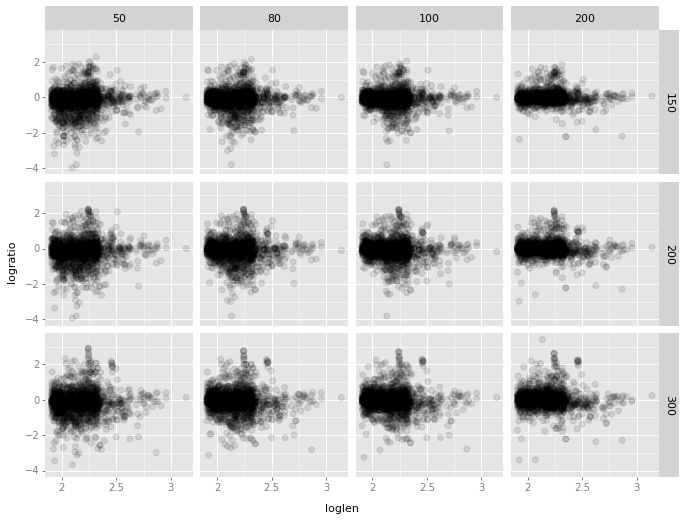

<ggplot: (8739923901423)>


In [25]:
d = dfa[dfa['UTR_length'] > 80][['UTR_length', 'ratio_ATCACG', 'offset', 'win']].copy()
d['logratio'] = np.log10(d['ratio_ATCACG'])
d['loglen'] = np.log10(d['UTR_length'])
p = ggplot(d, aes(x='loglen', y='logratio')) \
        + geom_point(alpha=0.1) \
        + facet_grid('offset ~ win')
print(p)

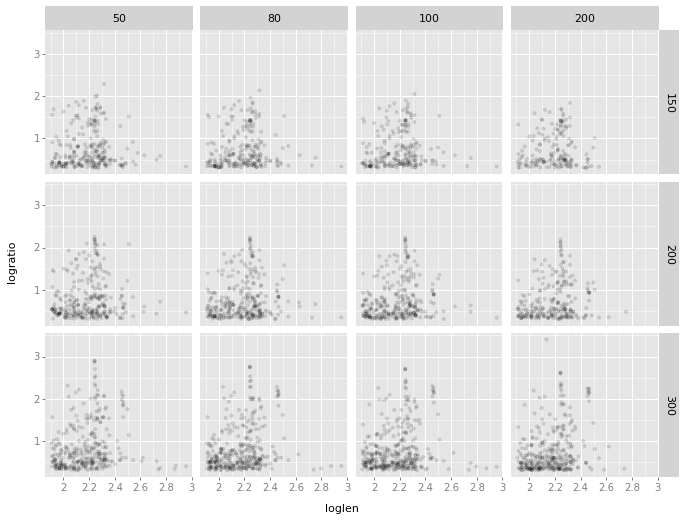

<ggplot: (-9223363296931623452)>


In [34]:
d = dfa[(dfa['UTR_length'] > 80) & (dfa['ratio_ATCACG'] > 2)][['UTR_length', 'ratio_ATCACG', 'offset', 'win']].copy()
d['logratio'] = np.log10(d['ratio_ATCACG'])
d['loglen'] = np.log10(d['UTR_length'])
p = ggplot(d, aes(x='loglen', y='logratio')) \
        + geom_point(alpha=0.1, size=2) \
        + facet_grid('offset ~ win')
print(p)

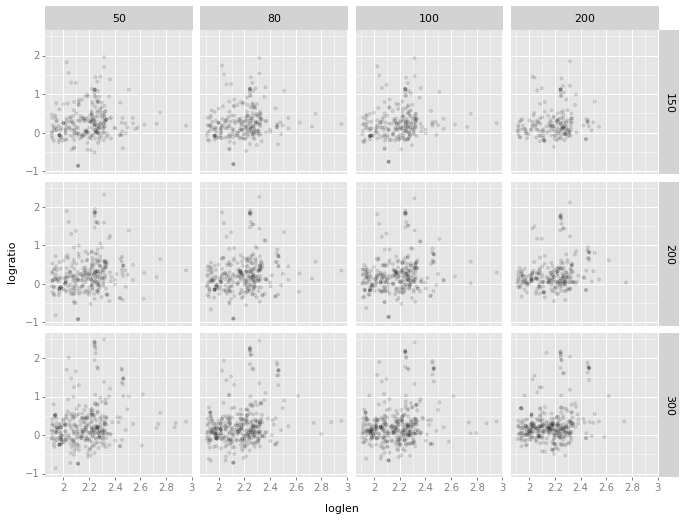

<ggplot: (-9223363296931581987)>


In [33]:
d = dfa[(dfa['UTR_length'] > 80) & (dfa['ratio_ATCACG'] > 2)][['UTR_length', 'ratio_CGATGT', 'offset', 'win']].copy()
d['logratio'] = np.log10(d['ratio_CGATGT'])
d['loglen'] = np.log10(d['UTR_length'])
p = ggplot(d, aes(x='loglen', y='logratio')) \
        + geom_point(alpha=0.1, size=2) \
        + facet_grid('offset ~ win')
print(p)

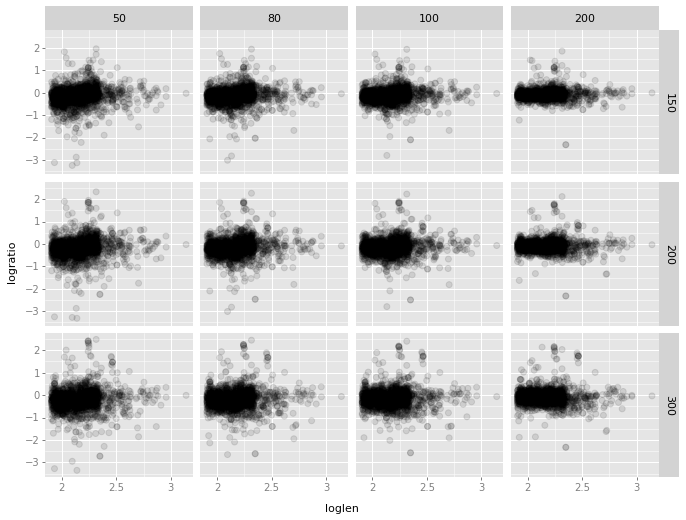

<ggplot: (-9223363296931319906)>


In [28]:
d = dfa[dfa['UTR_length'] > 80][['UTR_length', 'ratio_CGATGT', 'offset', 'win']].copy()
d['logratio'] = np.log10(d['ratio_CGATGT'])
d['loglen'] = np.log10(d['UTR_length'])
p = ggplot(d, aes(x='loglen', y='logratio')) \
        + geom_point(alpha=0.1) \
        + facet_grid('offset ~ win')
print(p)

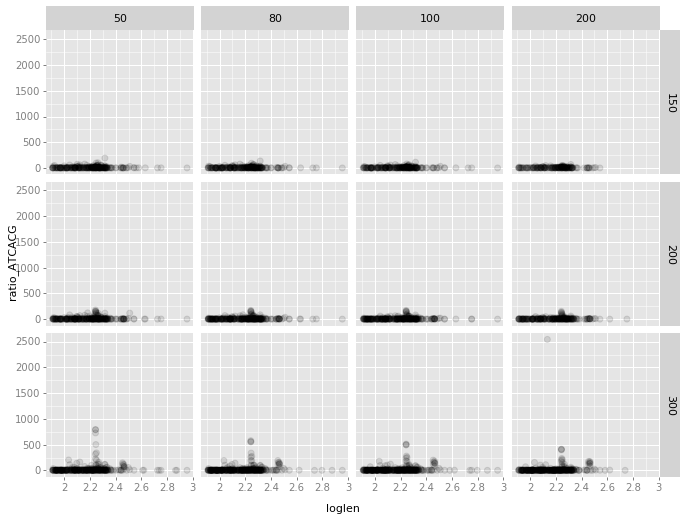

<ggplot: (8739923437078)>


In [31]:
d = dfa[(dfa['UTR_length'] > 80) & (dfa['ratio_ATCACG'] > 2)][['UTR_length', 'ratio_ATCACG', 'offset', 'win']].copy()
d['loglen'] = np.log10(d['UTR_length'])
p = ggplot(d, aes(x='loglen', y='ratio_ATCACG')) \
        + geom_point(alpha=0.1) \
        + facet_grid('offset ~ win')
print(p)

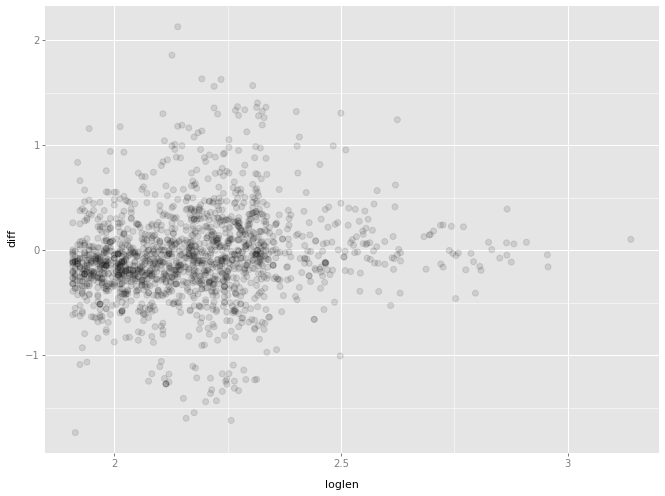

<ggplot: (-9223363272708502973)>


In [18]:
d = dfa[dfa['UTR_length'] > 80][['UTR_length', 'ratio_ATCACG', 'ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['diff'] = d['log+bcm'] - d['log-bcm']
d['loglen'] = np.log10(d['UTR_length'])

p = ggplot(d, aes(x='loglen', y='diff')) \
        + geom_point(alpha=0.1)
print(p)

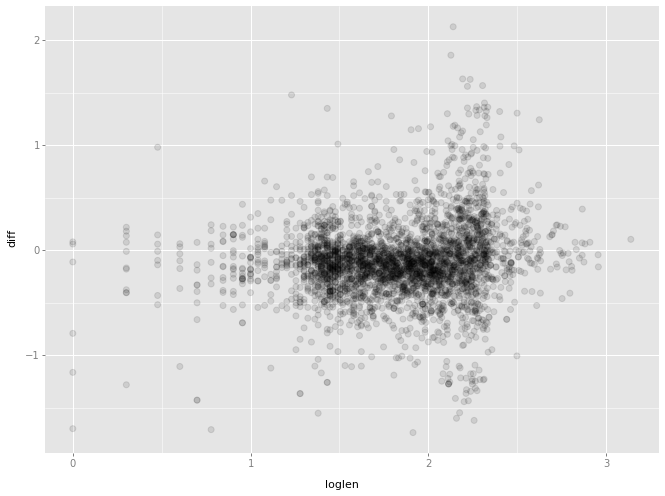

<ggplot: (8764146175913)>


In [19]:
d = dfa[dfa['UTR_length'] > 0][['UTR_length', 'ratio_ATCACG', 'ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['diff'] = d['log+bcm'] - d['log-bcm']
d['loglen'] = np.log10(d['UTR_length'])

p = ggplot(d, aes(x='loglen', y='diff')) \
        + geom_point(alpha=0.1)
print(p)

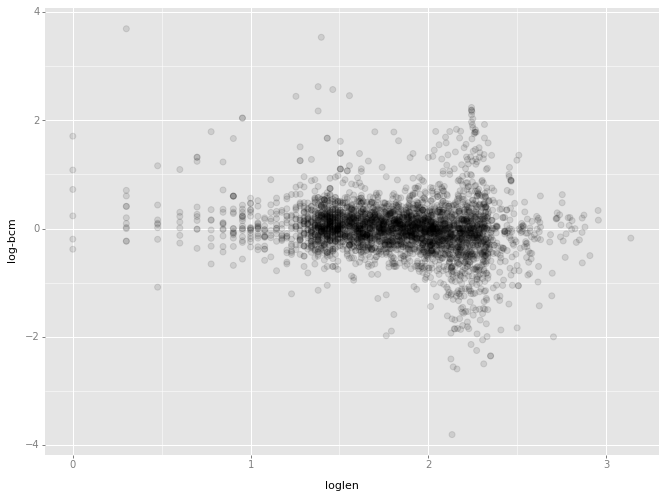

<ggplot: (-9223363272708565013)>


In [20]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1)
print(p)

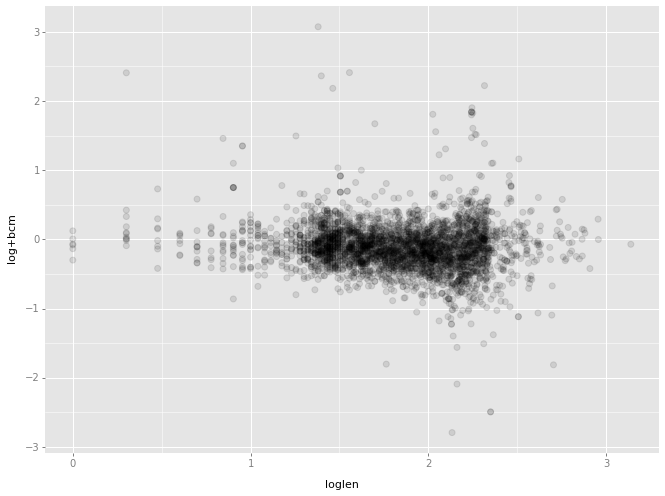

<ggplot: (8764146136107)>


In [21]:
p = ggplot(d, aes(x='loglen', y='log+bcm')) \
        + geom_point(alpha=0.1)
print(p)

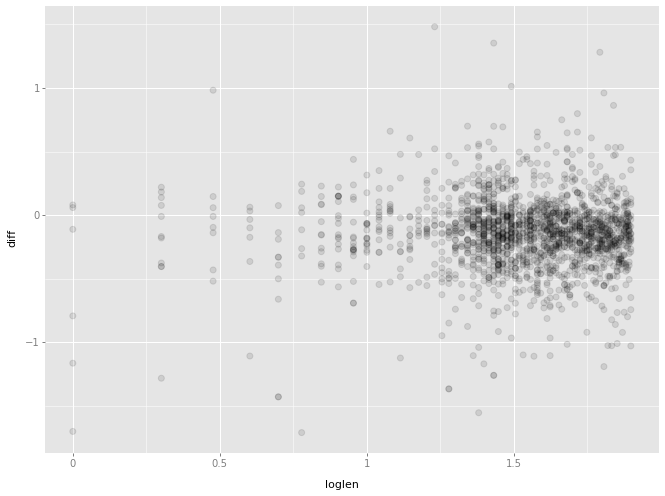

<ggplot: (8764146272923)>


In [22]:
d = dfa[(dfa['UTR_length'] < 80) & (dfa['UTR_length'] > 0)][['UTR_length', 'ratio_ATCACG', 'ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['diff'] = d['log+bcm'] - d['log-bcm']
d['loglen'] = np.log10(d['UTR_length'])

p = ggplot(d, aes(x='loglen', y='diff')) \
        + geom_point(alpha=0.1)
print(p)

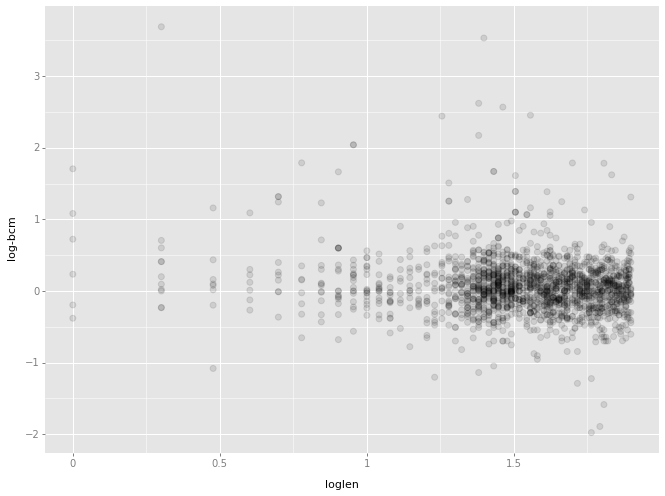

<ggplot: (8764146208078)>


In [23]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1)
print(p)

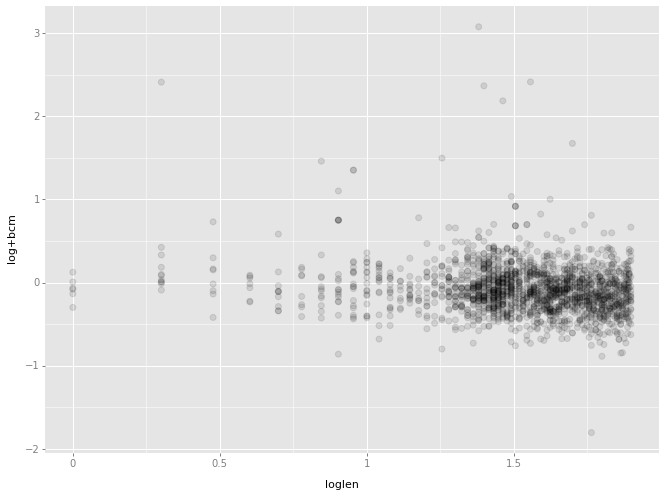

<ggplot: (8764142303012)>


In [24]:
p = ggplot(d, aes(x='loglen', y='log+bcm')) \
        + geom_point(alpha=0.1)
print(p)

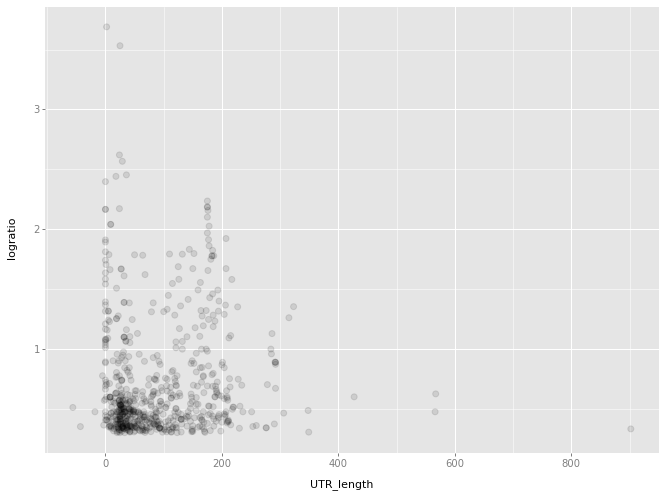

<ggplot: (-9223363272712434232)>


In [25]:
d = dfa[dfa['ratio_ATCACG'] > 2][['UTR_length', 'ratio_ATCACG']].copy()
d['logratio'] = np.log10(d['ratio_ATCACG'])
p = ggplot(d, aes(x='UTR_length', y='logratio')) \
        + geom_point(alpha=0.1)
print(p)

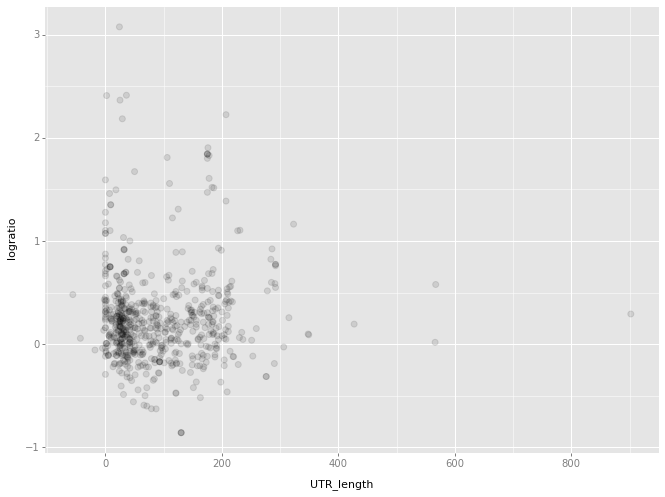

<ggplot: (8764142350817)>


In [26]:
d = dfa[dfa['ratio_ATCACG'] > 2][['UTR_length', 'ratio_ATCACG', 'ratio_CGATGT']].copy()
d['logratio'] = np.log10(d['ratio_CGATGT'])
p = ggplot(d, aes(x='UTR_length', y='logratio')) \
        + geom_point(alpha=0.1)
print(p)

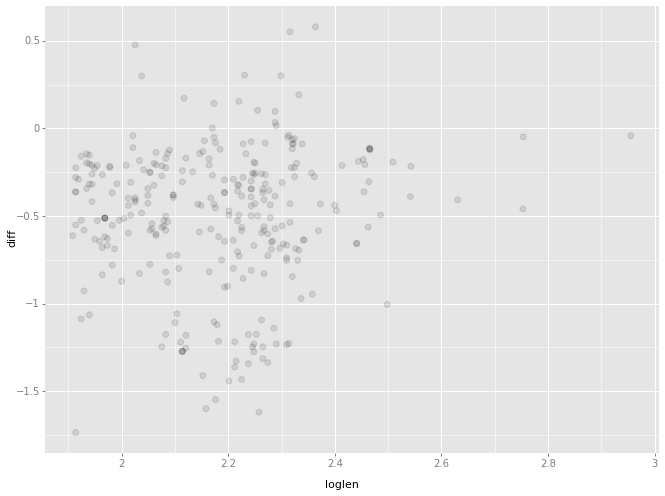

<ggplot: (8764146104917)>


In [52]:
d = dfa[(dfa['UTR_length'] > 80) & (dfa['ratio_ATCACG'] > 2)][['gene', 'UTR_length', 'ratio_ATCACG', 'ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['diff'] = d['log+bcm'] - d['log-bcm']
d['loglen'] = np.log10(d['UTR_length'])

p = ggplot(d, aes(x='loglen', y='diff')) \
        + geom_point(alpha=0.1)
print(p)

In [55]:
d[d['diff'] < 0].to_csv('../../results/redux/ratio_genes.csv', sep='\t')

In [56]:
d[(d['diff'] < 0) & (d['gene'] == 'rpoS')]

,gene,UTR_length,ratio_ATCACG,ratio_CGATGT,log-bcm,log+bcm,diff,loglen
2317,rpoS,567,4.234783,3.784314,0.626831,0.577987,-0.048844,2.753583


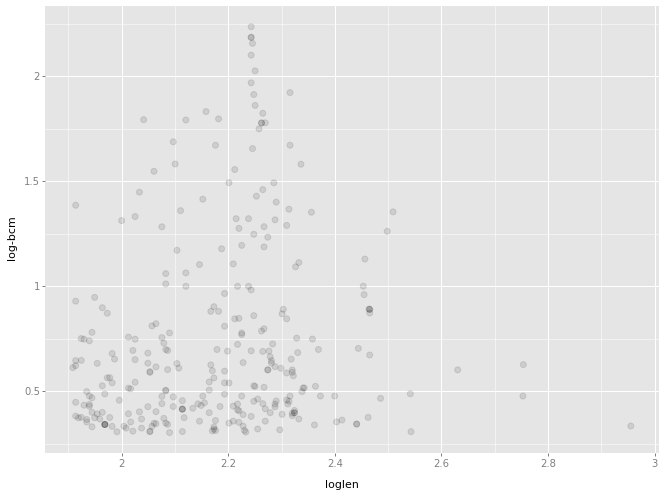

<ggplot: (8764146213836)>


In [34]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1)
print(p)

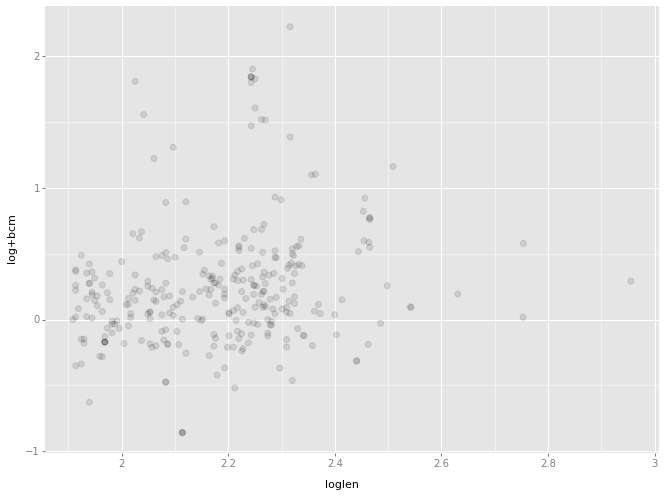

<ggplot: (-9223363272712464096)>


In [35]:
p = ggplot(d, aes(x='loglen', y='log+bcm')) \
        + geom_point(alpha=0.1)
print(p)

In [36]:
d[d['gene'] == 'rpoS']

,gene,UTR_length,ratio_ATCACG,ratio_CGATGT,log-bcm,log+bcm,diff,loglen
2317,rpoS,567,4.234783,3.784314,0.626831,0.577987,-0.048844,2.753583


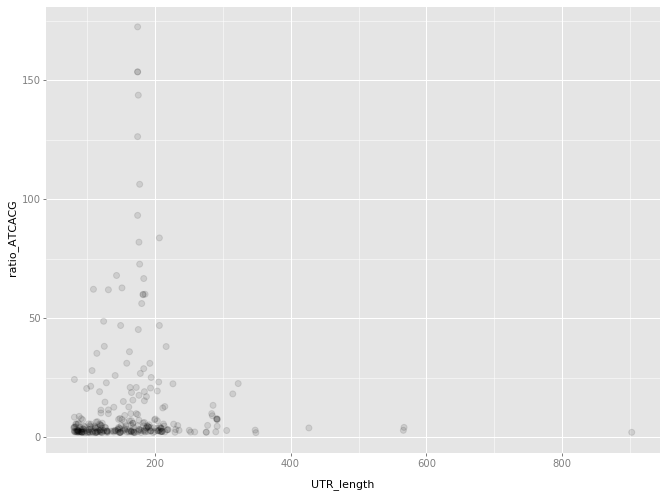

<ggplot: (8764142259383)>


In [38]:
p = ggplot(d, aes(x='UTR_length', y='ratio_ATCACG')) \
        + geom_point(alpha=0.1)
print(p)

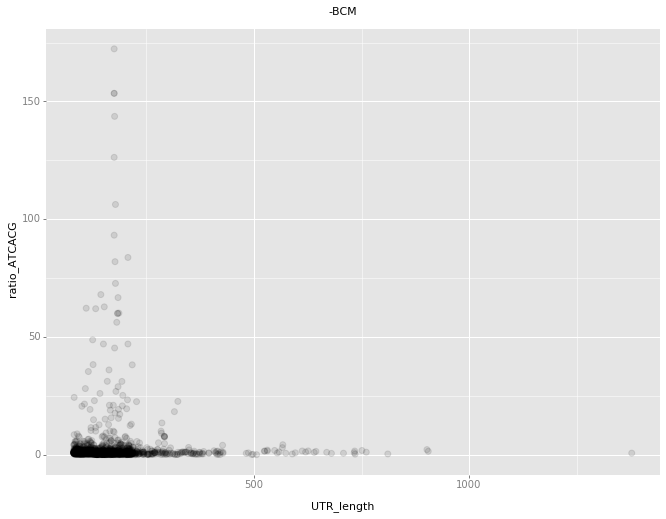

<ggplot: (8764142312666)>


In [44]:
d = dfa[dfa['UTR_length'] > 80][['gene', 'UTR_length', 'ratio_ATCACG', 'ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['diff'] = d['log+bcm'] - d['log-bcm']
d['loglen'] = np.log10(d['UTR_length'])

p = ggplot(d, aes(x='UTR_length', y='ratio_ATCACG')) \
        + geom_point(alpha=0.1) \
        + ggtitle("-BCM")
print(p)

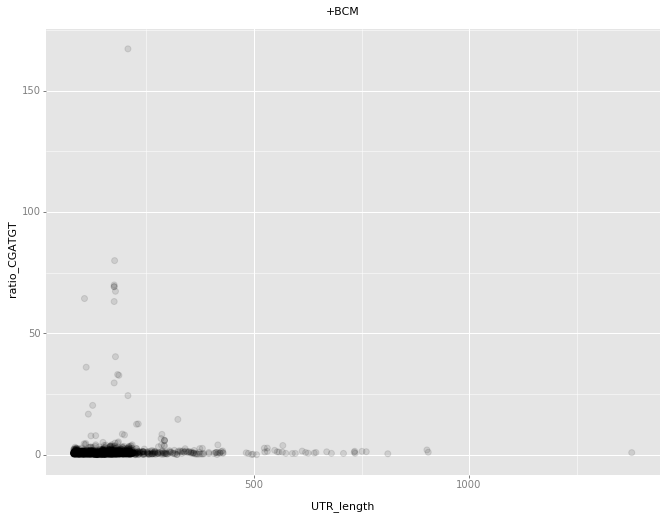

<ggplot: (8764146060208)>


In [45]:
p = ggplot(d, aes(x='UTR_length', y='ratio_CGATGT')) \
        + geom_point(alpha=0.1) \
        + ggtitle('+BCM')
print(p)

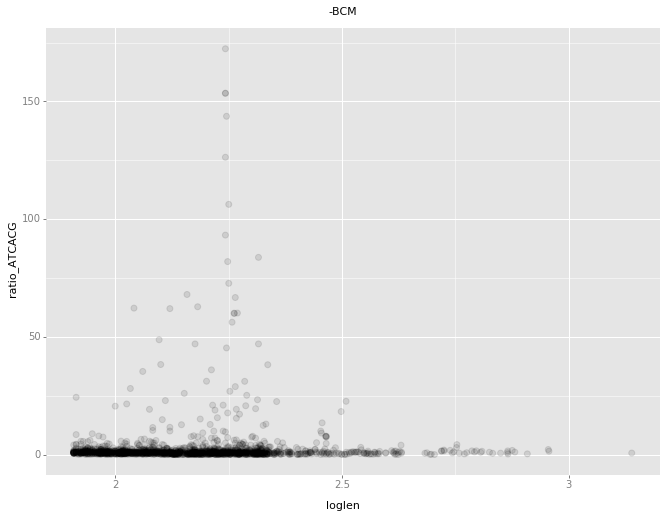

<ggplot: (-9223363272712499249)>


In [46]:
p = ggplot(d, aes(x='loglen', y='ratio_ATCACG')) \
        + geom_point(alpha=0.1) \
        + ggtitle('-BCM')
print(p)

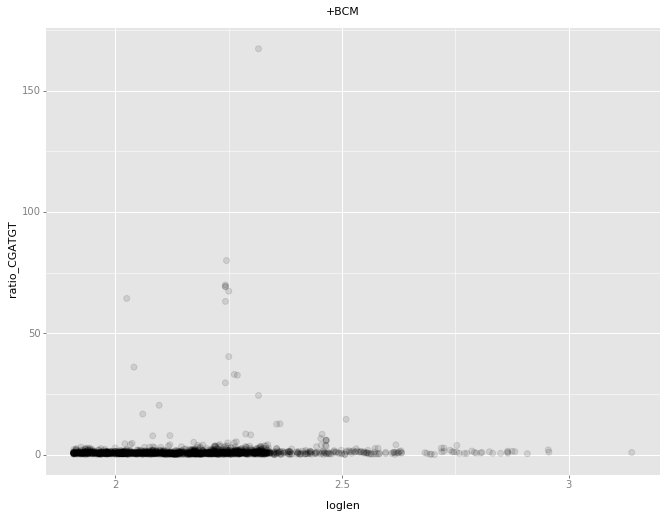

<ggplot: (8764142349667)>


In [47]:
p = ggplot(d, aes(x='loglen', y='ratio_CGATGT')) \
        + geom_point(alpha=0.1) \
        + ggtitle('+BCM')
print(p)

In [48]:
d[d['gene'] == 'rpoS']

,gene,UTR_length,ratio_ATCACG,ratio_CGATGT,log-bcm,log+bcm,diff,loglen
2315,rpoS,103,0.490431,0.559211,-0.309422,-0.252425,0.056998,2.012837
2316,rpoS,173,1.392000,1.036842,0.143639,0.015713,-0.127927,2.238046
2317,rpoS,567,4.234783,3.784314,0.626831,0.577987,-0.048844,2.753583


In [51]:
d[d['diff'] < 0]

,gene,UTR_length,ratio_ATCACG,ratio_CGATGT,log-bcm,log+bcm,diff,loglen
2,yaaX,204,3.863636,0.704545,0.586996,-0.152091,-0.739087,2.309630
13,dnaK,115,0.562138,0.277008,-0.250157,-0.557508,-0.307351,2.060698
22,rpsT,132,0.457310,0.284276,-0.339789,-0.546259,-0.206470,2.120574
24,ileS,558,1.171171,1.096386,0.068620,0.039963,-0.028657,2.746634
26,ileS,162,0.974497,0.475341,-0.011220,-0.322995,-0.311775,2.209515
27,lspA,193,0.966501,0.511591,-0.014798,-0.291077,-0.276280,2.285557
30,carA,100,0.581152,0.276923,-0.235710,-0.557641,-0.321930,2.000000
33,caiF,82,1.533333,0.384000,0.185637,-0.415669,-0.601305,1.913814
37,caiT,106,1.000000,0.513514,0.000000,-0.289448,-0.289448,2.025306
43,apaG,428,1.065199,0.845397,0.027431,-0.072939,-0.100370,2.631444
